
# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-6 | Date: Nov 17, 2023

## **# Convolutional Neural Networks (CNNs): Part-2:**
## **# Identiying Overfitting and solving using regularization**


In this  Lab/Tutorial session you will be implementing regularization to avoid overfitting.

So lets get started!

## Tutorial:
Implementation of a  CNN architecture using Keras for classfication of Cats/Dogs Dataset from Kaggle.

## Tasks for this week:

1. Implementation of Neural Network for Dogs and Cats classification using Keras API.
2. Train and test model and identify overfitting.
3. Data augmentation and Drop outs


### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 2: Download the Cats & Dogs dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-11-17 07:36:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   145MB/s    in 0.4s    

2023-11-17 07:36:38 (145 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


### Step 3:  Design the CNN Architecture

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1EAWFwp7T92q3Lm1ZrX9A2-wnvhfAfzSF' alt='Conv'>

Input: $150 X 150 X 3$ image

No. of filters, filter size:
- Conv1 : 32, 3x3
- Conv2 : 64, 3x3
- Conv3 : 128, 3x3
- Conv4 : 128, 3x3

Activation function in CONV layer: Relu

Pool: MaxPooling, 2x2

Activation function in Output layer : sigmoid, 2 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Step 4:  Training CNN with ImageDataGenerator

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100


<ipython-input-7-66a78b48bdb3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 18s - loss: 0.6907 - acc: 0.5305 - val_loss: 0.6894 - val_acc: 0.5170 - 18s/epoch - 176ms/step
Epoch 2/100
100/100 - 5s - loss: 0.6751 - acc: 0.5735 - val_loss: 0.6772 - val_acc: 0.5260 - 5s/epoch - 54ms/step
Epoch 3/100
100/100 - 5s - loss: 0.6627 - acc: 0.6025 - val_loss: 0.6488 - val_acc: 0.6220 - 5s/epoch - 47ms/step
Epoch 4/100
100/100 - 6s - loss: 0.6443 - acc: 0.6275 - val_loss: 0.6276 - val_acc: 0.6460 - 6s/epoch - 63ms/step
Epoch 5/100
100/100 - 5s - loss: 0.6146 - acc: 0.6665 - val_loss: 0.6420 - val_acc: 0.6370 - 5s/epoch - 48ms/step
Epoch 6/100
100/100 - 6s - loss: 0.5822 - acc: 0.6960 - val_loss: 0.5744 - val_acc: 0.6950 - 6s/epoch - 64ms/step
Epoch 7/100
100/100 - 6s - loss: 0.5550 - acc: 0.7155 - val_loss: 0.5753 - val_acc: 0.7040 - 6s/epoch - 58ms/step
Epoch 8/100
100/100 - 5s - loss: 0.5359 - acc: 0.7310 - val_loss: 0.5704 - val_acc: 0.7050 - 5s/epoch - 48ms/step
Epoch 9/100
100/100 - 6s - loss: 0.5071 - acc: 0.7565 - val_loss: 0.5468 - val_acc: 0.7200 - 6s/e

### Step 5:  Visualization of results and identification of overfitting

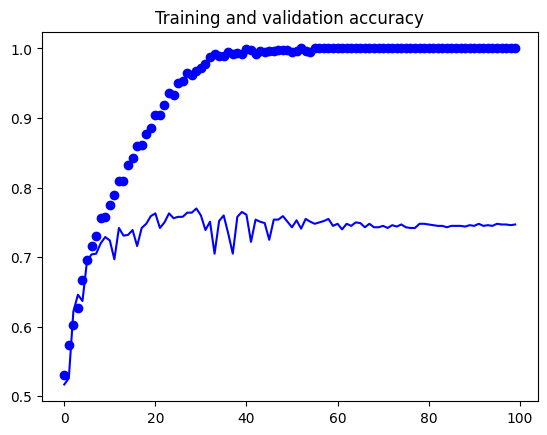

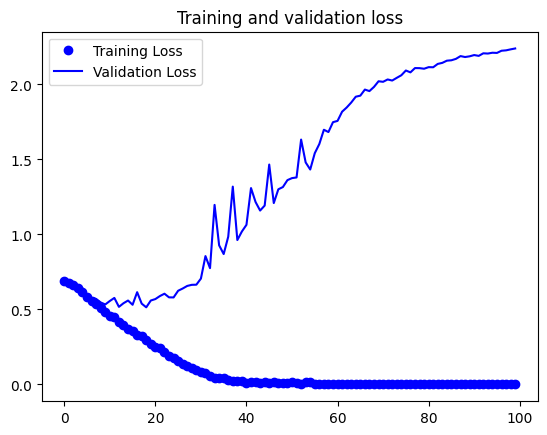

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Step 6:  Design of CNN for data augmentation

In [9]:
model_data_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### Step 7:  Using ImageDataGenerator for data augmentation

In [10]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model_data_aug.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model_data_aug.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100


<ipython-input-11-1123f9ea1724>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_data_aug.fit_generator(


100/100 - 19s - loss: 0.6926 - acc: 0.5165 - val_loss: 0.6907 - val_acc: 0.5000 - 19s/epoch - 185ms/step
Epoch 2/100
100/100 - 17s - loss: 0.6857 - acc: 0.5420 - val_loss: 0.6899 - val_acc: 0.5180 - 17s/epoch - 168ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6812 - acc: 0.5720 - val_loss: 0.6607 - val_acc: 0.6170 - 16s/epoch - 158ms/step
Epoch 4/100
100/100 - 16s - loss: 0.6741 - acc: 0.5830 - val_loss: 0.6691 - val_acc: 0.5510 - 16s/epoch - 164ms/step
Epoch 5/100
100/100 - 16s - loss: 0.6715 - acc: 0.5825 - val_loss: 0.6468 - val_acc: 0.6210 - 16s/epoch - 161ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6556 - acc: 0.6050 - val_loss: 0.6208 - val_acc: 0.6720 - 16s/epoch - 158ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6453 - acc: 0.6290 - val_loss: 0.6163 - val_acc: 0.6540 - 16s/epoch - 158ms/step
Epoch 8/100
100/100 - 16s - loss: 0.6347 - acc: 0.6365 - val_loss: 0.5965 - val_acc: 0.6840 - 16s/epoch - 164ms/step
Epoch 9/100
100/100 - 16s - loss: 0.6323 - acc: 0.6465 - val_loss: 0.5768 - 

### Step 8:  Visualization the results

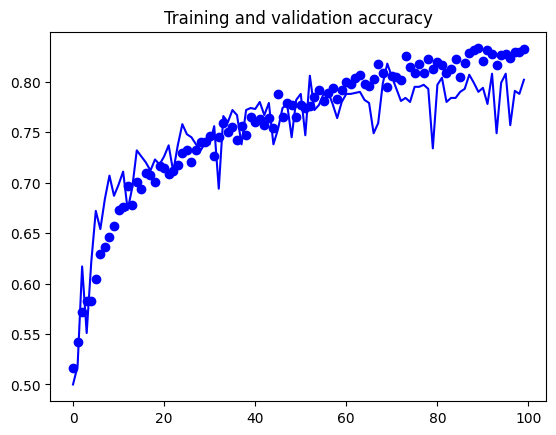

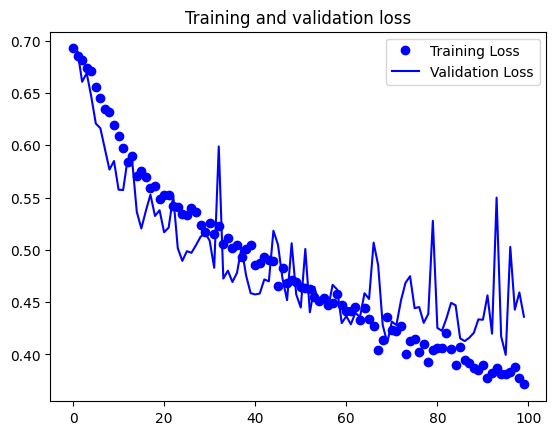

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Step 9:  Using drop outs and data augmentation

In [ ]:
model_drop_out = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), #Adding Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_drop_out.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model_drop_out.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


<ipython-input-14-3dbd691ec861>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_drop_out.fit_generator(


100/100 - 20s - loss: 0.6944 - acc: 0.5090 - val_loss: 0.6896 - val_acc: 0.6110 - 20s/epoch - 196ms/step
Epoch 2/100
100/100 - 17s - loss: 0.6911 - acc: 0.5235 - val_loss: 0.6807 - val_acc: 0.6120 - 17s/epoch - 173ms/step
Epoch 3/100
100/100 - 20s - loss: 0.6839 - acc: 0.5575 - val_loss: 0.6703 - val_acc: 0.5390 - 20s/epoch - 197ms/step
Epoch 4/100
100/100 - 17s - loss: 0.6768 - acc: 0.5620 - val_loss: 0.6619 - val_acc: 0.6110 - 17s/epoch - 173ms/step
Epoch 5/100
100/100 - 18s - loss: 0.6708 - acc: 0.5860 - val_loss: 0.6485 - val_acc: 0.6300 - 18s/epoch - 181ms/step
Epoch 6/100
100/100 - 17s - loss: 0.6620 - acc: 0.5905 - val_loss: 0.6278 - val_acc: 0.6460 - 17s/epoch - 172ms/step
Epoch 7/100
100/100 - 20s - loss: 0.6531 - acc: 0.5990 - val_loss: 0.6259 - val_acc: 0.6330 - 20s/epoch - 197ms/step
Epoch 8/100
100/100 - 17s - loss: 0.6480 - acc: 0.6150 - val_loss: 0.7733 - val_acc: 0.5270 - 17s/epoch - 173ms/step
Epoch 9/100
100/100 - 18s - loss: 0.6347 - acc: 0.6320 - val_loss: 0.5867 - 

### Step 10:  Visualization of results

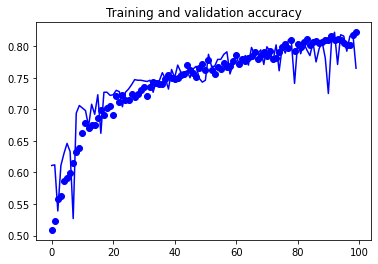

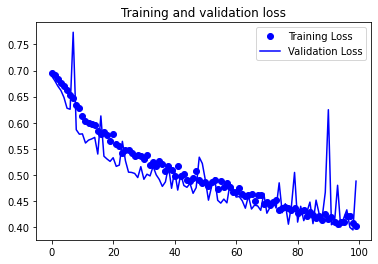

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Optional:

Try changing the Regularization to L1 and L2 and check output

Hint:

**L1** : tf.keras.regularizers.l1(l=0.01)

**L2**: tf.keras.regularizers.l2(l=0.01)

Reference: https://keras.io/regularizers/